In [112]:
from PIL import Image
import pytesseract
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

512 320


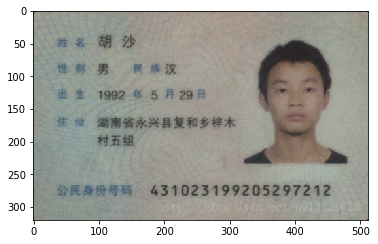

In [150]:
img_s=Image.open("D:\\tmp\\IDCard001.png")
#img_s=Image.open("D:\\tmp\\IDCard002.jpg")
print(img_s.width,img_s.height)
imshow(np.asarray(img_s))

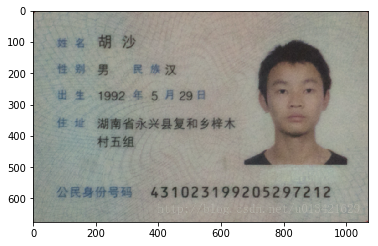

In [151]:
img_resize=img_s.resize((214*5, 135*5),Image.ANTIALIAS)
imshow(np.asarray(img_resize))

In [152]:
###########二值化算法
def binarizing(img,threshold):
    pixdata = img.load()
    w, h = img.size
    for y in range(h):
        for x in range(w):
            if pixdata[x, y] < threshold:
                pixdata[x, y] = 0
            else:
                pixdata[x, y] = 255
    return img
###########截取图片
def cut_and_show(img,left,top,right,bottom):
    box=img_resize.copy()
    box=(left,top,right,bottom)
    region=img_resize.crop(box)
    imshow(np.asarray(region))
    return region
###########识别图片文本信息信息
def text_recognize(img,left,top,right,bottom,bin_threshold=100,lang="eng",config=""):
    region_box=img.copy()
    region_box=(left,top,right,bottom)
    region=img.crop(region_box)
#     imshow(np.asarray(region))
    region_gray=region.convert("L")
#     imshow(np.asarray(region_gray))
    region_bin=binarizing(region_gray,bin_threshold)
#     imshow(np.asarray(region_bin))
    code = pytesseract.image_to_string(region_bin,lang=lang,config=config)
    return code.replace("\n","").strip()
    
    

In [153]:
card_name=text_recognize(img_resize,180,75,400,125,lang="chi_sim")
card_name

'胡沙'

In [154]:
card_sex=text_recognize(img_resize,200,160,250,220,lang="chi_sim",config="-psm 8")
card_sex

'男'

In [155]:
card_nation=text_recognize(img_resize,410,170,480,210,lang="chi_sim",config="-psm 8")
card_nation

'汉'

In [162]:
card_id=text_recognize(img_resize,350,540,970,610,bin_threshold=100,config="-psm 8")
card_id

'431023199205297212'

In [163]:
card_addr=text_recognize(img_resize,180,320,700,450,bin_threshold=100,lang="chi_sim")
card_addr

'湖南省永兴县夏和乡梓木村五组'

In [164]:
card_year=text_recognize(img_resize,190,250,300,300,config="-psm 8")
card_year

'1992'

In [165]:
card_month=text_recognize(img_resize,360,250,420,300,config="-psm 8")
card_month

'5'

In [168]:
card_day=text_recognize(img_resize,460,250,520,300,config="-psm 8")
card_day

'29'

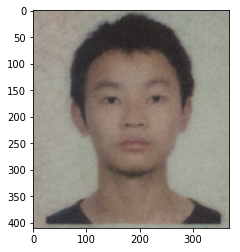

In [174]:
card_photo=cut_and_show(img_resize,650,90,1020,500)

In [167]:
print("姓名："+card_name)
print("性别："+card_sex)
print("民族："+card_nation)
print("出生日期："+card_year+"年"+card_month+"月"+card_day+"日")
print("地址："+card_addr)
print("证件号码："+card_id)

姓名：胡沙
性别：男
民族：汉
出生日期：1992年5月29日
地址：湖南省永兴县夏和乡梓木村五组
证件号码：431023199205297212
